# Test of fleGODynamic library

In [254]:
1e-12/20/1e-3

5e-11

In [320]:
import sys 
import sympy as sm
import numpy as np
# del flex_body_instance
del sys.modules["fleGODynamics"]
import fleGODynamics
flex_beam_instance = fleGODynamics.Flex_beam(L=0.02,E=2.95*1e9,h=0.01,w=0.0005)
flex_beam_instance.Create_Simulation(disp=False)
flex_beam_instance.FEM(Ne=20,disp=False)
flex_beam_instance.Simulating.Ldivide(step_mult=0.5,disp=True)
flex_beam_instance.Simulating.static_preparing(disp=False,Fext=1,l_Fext=0.01)

<IPython.core.display.Math object>

Found numpy zip archive with preparing data: psi vectors, F,M matrix. Checking if we can use it!
Checking finished. Using loaded data


In [321]:
flex_beam_instance.Simulating.static()

iter=1,cost= 347.6866852889142


ValueError: The user-provided objective function must return a scalar value.

Found an approximation. Will use it!
evaluation time: 4.001 ms
time for 1 step: 1.999 us


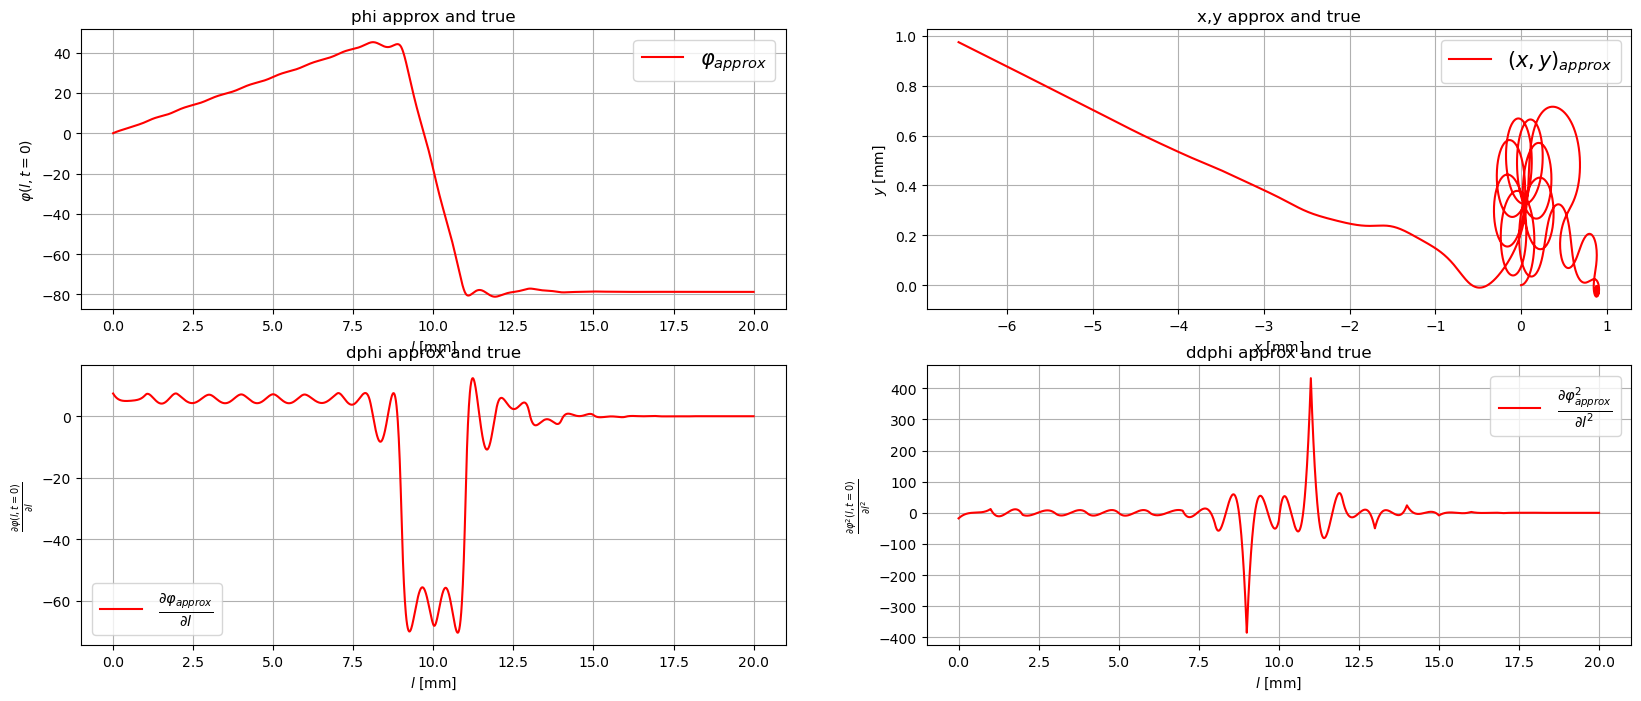

In [319]:
flex_beam_instance.Simulating.phi_approx(disp_time=True,der_num=2)

In [296]:
l = sm.symbols("l")
phi = 0.6*(1.7*sm.sin(1.7e-1*l)+0.3*(sm.exp(l/10))-0.3)
flex_beam_instance.Simulating.set_phi(phi,disp=False)
flex_beam_instance.Simulating.create_a(disp=False)
# flex_beam_instance.Simulating.show_one_element_approx(e=5)
flex_beam_instance.Simulating.phi_approx_preparing()

flex_beam_instance.Simulating.phi_approx(disp_time=True,der_num=2)

Found numpy zip archive with preparing data: psi vectors. Checking if we can use it!
Checking finished. We cannot use this data as FEM or/and Ldivide parameters mismatch. Creating new one:


KeyboardInterrupt: 

In [ ]:
str_a = np.str_( np.round(flex_beam_instance.Simulating.get_a_diff(),8)).replace('\n', ' ').replace(' ',',').replace(',,,,',',').replace(',,,',',').replace(',,',',') 
print( str_a[0] + str_a[2:])# + str_a[-1] )
# print(len(np.round(flex_beam_instance.Simulating.get_a_diff(),3)))

[0.44584879,0.28704035,0.41002227,0.48640483,-0.02378148,0.8553858,0.08721603,0.04077981,1.01688852,0.07782734,0.02472877,1.07340978,0.09319819,0.01512953,1.08550036,0.10397254,0.01233037,1.09153201,0.11577704,0.01529716,1.08920455,0.13473095,0.03009563,1.0672586,0.12939623,0.0608087,1.13719173,0.22634223,0.11276199,1.24417473]


In [ ]:
a_approx = flex_beam_instance.Simulating.get_a_approx()
# a_approx = np.array([0.,1.398054,0.522382,0.984477,-0.24426,0.254438,0.984477,-0.24426,0.254438,1.000862,-0.248743,0.255066,1.000862,-0.248743,0.255066,0.999999,-0.248574,0.255055,0.999999,-0.248574,0.255055,1.,-0.248575,0.255055,1.,-0.248575,0.255055,1.,-0.248575,0.255055,1.,-0.248575,0.255055,1.,-0.248574,0.255055,1.,-0.248574,0.255055,0.999948,-0.248585,0.255054,0.999948,-0.248585,0.255054,0.993998,-0.249492,0.254917,0.993998,-0.249492,0.254917,1.206959,-0.150128,0.269416,1.206959,-0.150128,0.269416,2.049172,1.177882,0.710173])
str_a = np.str_( np.round(a_approx,6)).replace('\n', ' ').replace(' ',',').replace(',,,,',',').replace(',,,',',').replace(',,',',') 
print( str_a[0] + str_a[2:] )
# print(len(a_approx))

[0.,-0.445849,0.28704,0.410022,0.486405,-0.023781,0.410022,0.486405,-0.023781,0.855386,0.087216,0.04078,0.855386,0.087216,0.04078,1.016889,0.077827,0.024729,1.016889,0.077827,0.024729,1.07341,0.093198,0.01513,1.07341,0.093198,0.01513,1.0855,0.103973,0.01233,1.0855,0.103973,0.01233,1.091532,0.115777,0.015297,1.091532,0.115777,0.015297,1.089205,0.134731,0.030096,1.089205,0.134731,0.030096,1.067259,0.129396,0.060809,1.067259,0.129396,0.060809,1.137192,0.226342,0.112762,1.137192,0.226342,0.112762,1.244175,0.,0.,]


In [ ]:
flex_beam_instance.Simulating.set_a_approx(a_approx)

Optimization wasn't. Don't have a approximation!
evaluation time:220.0 ms
time for 1 step:220.0 us


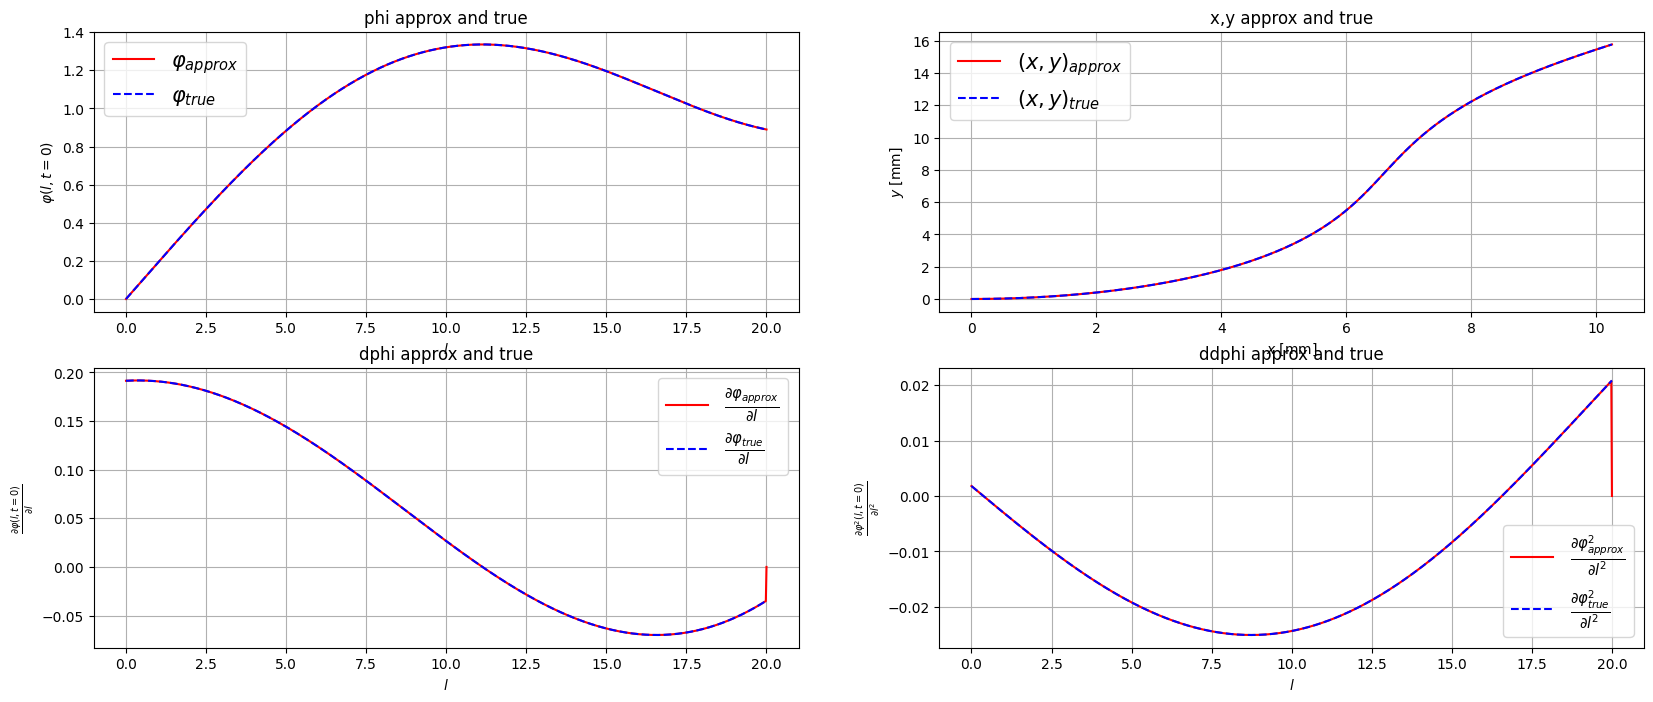

In [ ]:
flex_beam_instance.Simulating.phi_approx(disp_time=True,der_num=2)